## Introduction
Numerous online lending platforms have emerged in recent times, offering loan opportunities to businesses,
similar to banks. However, they are also faced with the risk of user loan default, which is correlated to the
sustainability and healthy development of the platforms.
The importance of calculating and predicting credit risks cannot be overemphasised. Evaluating an
individual’s financial information and historical data is pivotal to predicting whether he/she would default
on a loan or not.


Credit score cards are a common risk control method in the financial industry. It uses personal information,
and data submitted by credit card applicants to predict the probability of future defaults and credit card
borrowings. The bank or lending company is able to decide whether to issue a credit card to the applicant or
not. Credit scores can objectively quantify the magnitude of risk.
The project will focus on predicting whether an applicant is qualified to receive a loan or not.

## Introduction to the Dataset

We'll use the [Credit Card Approval](http://archive.ics.uci.edu/ml/datasets/credit+approval) dataset from the UCI Machine Learning Repository. This data is confidential and so the contributor of the dataset anonymized the feature names.
The work flow of this notebook is as follows:

- First, we will start by loading and viewing the dataset.
- We will see that the dataset has both numerical and non-numerical features and that it contains a number of missing entries.
- We will then take care of the missing values.
- After we have cleaned and prepared our data, we will do some exploratory data analysis to improve our understanding.
- We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
- Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be approved.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

The features of this dataset have been anonymized to protect the privacy, but this [blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

In [2]:
!git clone https://github.com/Phunbie/credit-card-approval-prediction

Cloning into 'credit-card-approval-prediction'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 135 (delta 45), reused 64 (delta 18), pack-reused 0
Receiving objects: 100% (135/135), 8.28 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [3]:
credit_card_app = pd.read_csv('/content/credit-card-approval-prediction/Data/credit_approval.data', header=None)
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
#Display first few rows
credit_card_app.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
#full description of the dataset
credit_card_app.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


As seen in the above summary statistics, the dataset contains missing values represented with a "?"

In [6]:
#replacing "?" with NaN for easy computation
credit_card_app = credit_card_app.replace("?", np.nan)

In [7]:
# inspecting to be sure all '?' has been replaced
credit_card_app.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


The missing values repreented with '?' have all been replaced with NaN  

In [8]:
#type conversion of numerical columns stored as object type
credit_card_app = credit_card_app.astype({1:'float', 13:'float'})

In [9]:
#Fill the numerical missing values using the mean inputation
credit_card_app.fillna(credit_card_app.mean(), inplace = True)

In [10]:
credit_card_app.isnull().sum()

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

The column containing missing values are categorical columns that could not be filled with mean inputation.
To fix this, we are going to use mode inputation method.

In [11]:
#iterating over each column of the dataset
for col in credit_card_app:
    #check if any column is categorical (object)
    if credit_card_app[col].dtype == 'object':
        #if colmn is categorical, input missing vales with the most frequent value
        credit_card_app = credit_card_app.fillna(credit_card_app[col].value_counts().index[0])

In [12]:
#check to see if there are stll missing values
credit_card_app.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

All missing values both numerical and categorical have been filled.

# Renaming the column

In [13]:
d = {0: 'Gender', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault', 9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13: 'ZipCode', 14:'Income', 15: 'ApprovalStatus' }

credit_card_app.rename(columns = d, inplace = True)

In [14]:
# check to see if it has effected the changes
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    float64
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


# DATA ANALYSIS

## 1. Univariate Analysis
## 2. Bivariate Analysis
## 3. Correlation Plot

# UNIVARIATE ANALYSIS

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

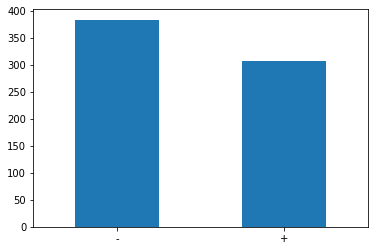

In [15]:
# Check the noise and biasness in the target column
credit_card_app['ApprovalStatus'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)


### The chart above shows that there is little noise in the target column, whuch means it is not biased.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

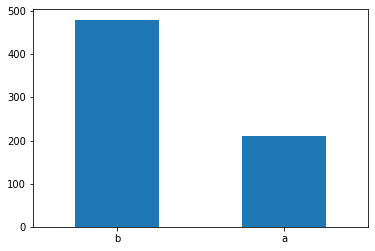

In [16]:
# Check which of the gender applied more for the credit card
credit_card_app['Gender'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

### The chart above shows that Gender_b applied more than Gender_a

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

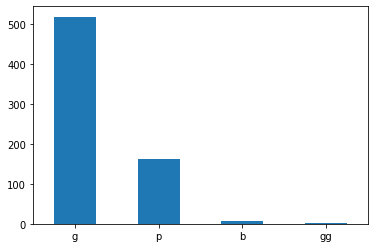

In [17]:
# Check which category of BankCustomers apllied more for the creditcard
credit_card_app['BankCustomer'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

## BankCustomers of category_g apllied more for creditcard, those of category_p aplled less for creditcard and Customers of category_gg was almost is insignificant


## Here, we have an hypothesis that category_gg is an oultlier and should probably be removed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

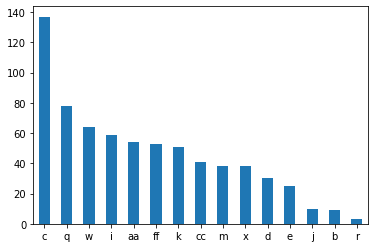

In [18]:
# Check for the educational level of applicants
credit_card_app['EducationLevel'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

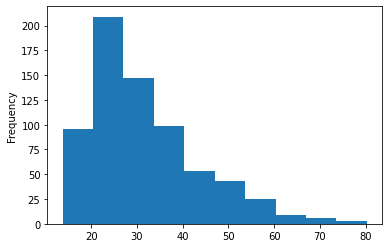

In [19]:
# Check for the age range of applicants
credit_card_app['Age'].plot(kind= 'hist')

### The chart above shows that applicants within the age bracket of 20-30 had more creditcard request

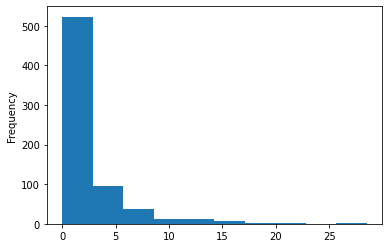

In [20]:
# Check the years of employment of applicants
credit_card_app['YearsEmployed'].plot(kind= 'hist')

### The chart above shows that applicants with below 5 years post employment had more creeditcard request

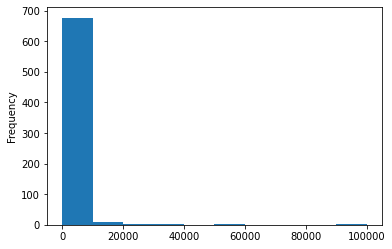

In [21]:
# Check the income of applicants
credit_card_app['Income'].plot(kind= 'hist')

### The chart above shows that majority of the applicants receive less than 20,000 as income

# BIVARIATE ANALYSIS

### The following columns were given top priority based on the information gotten with the dataset [prior default, years employed, credit score and income level]

<Figure size 720x504 with 0 Axes>

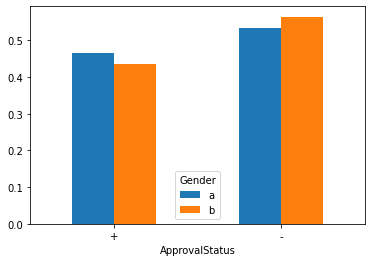

<Figure size 720x504 with 0 Axes>

In [22]:
# Check the relationship between gender and approval status
gender = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['Gender'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

### No significant relationship between gender and approvalstatus. It means gender is not a criteria for awarding creditcard

No handles with labels found to put in legend.


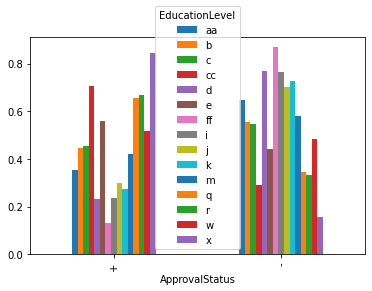

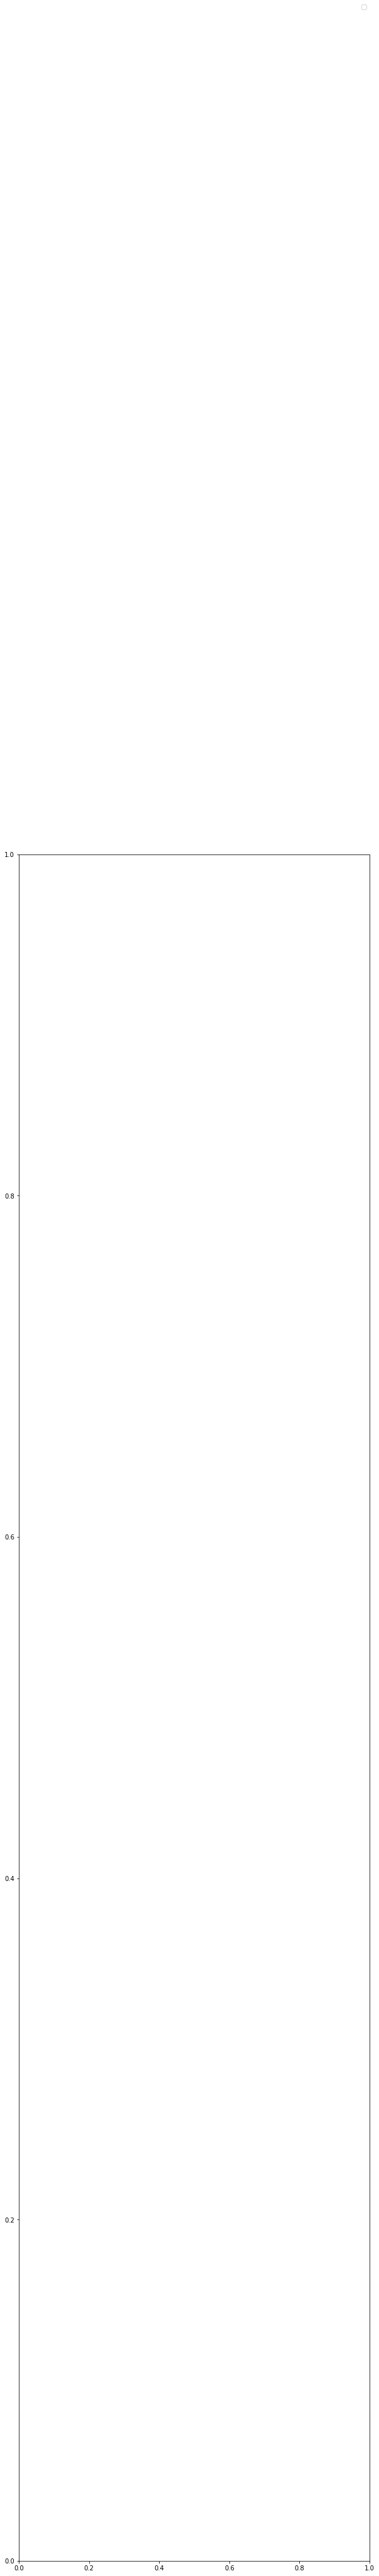

In [23]:
# Check relationship between educationlevel and approved status
education = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['EducationLevel'])
education
education.div(education.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)



plt.figure(figsize= (10,50))
plt.legend(bbox_to_anchor= (1,1.5))

### The chart shows no significant relationship

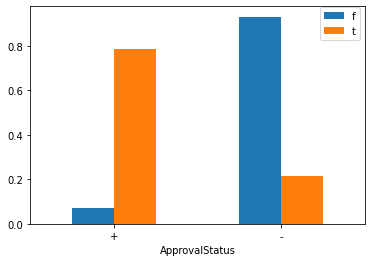

In [24]:
# check relationship between PriorDefault and ApprovalStatus
PriorDefault = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['PriorDefault'])
PriorDefault
PriorDefault.div(PriorDefault.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)


plt.xticks(rotation= 0)

plt.legend(bbox_to_anchor = (1, 1.02))

### PriorDefault has a significant relationship with ApprovalStatus which means those without a PriorDefault are prone to getting their loan approved

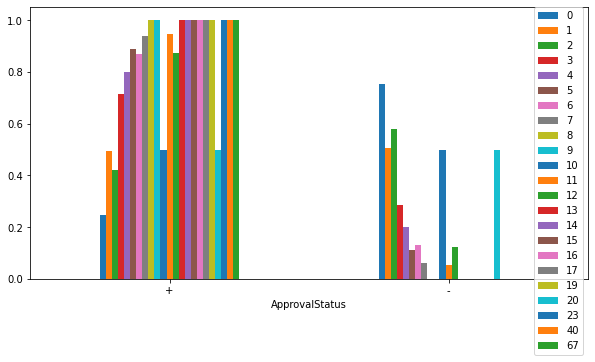

In [25]:
# Check relationship between creditscore and approval status
CreditScore = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['CreditScore'])
CreditScore
CreditScore.div(CreditScore.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False, figsize=(10,5))


plt.xticks(rotation= 0)

plt.legend(bbox_to_anchor = (1, 1.02))

### Creditscore has a significant relationship with approval status. Applicants with higher creditscores are more likely to get creditcard approval while those with lower creditscores are less likely to get creditcard approval


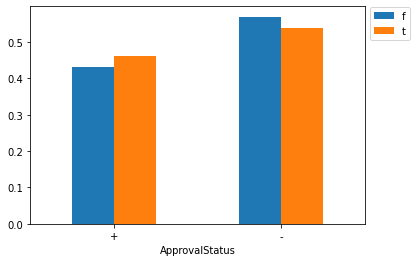

In [26]:
# Check relationship between creditcard and drivers license
DriversLicense = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['DriversLicense'])
DriversLicense
DriversLicense.div(DriversLicense.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)


plt.xticks(rotation= 0)

plt.legend(bbox_to_anchor = (1, 1.02))

### The chart above shows no significant relationship

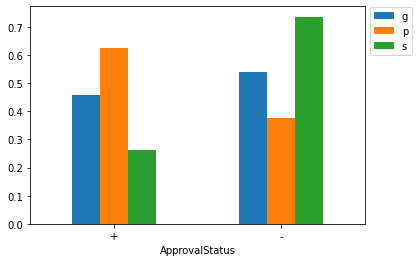

In [27]:
# Check relationship between creditcard and citizenship
Citizenship = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['Citizen'])
Citizenship
Citizenship.div(Citizenship.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)


plt.xticks(rotation= 0)

plt.legend(bbox_to_anchor = (1, 1.02))

### The chart above shows no significant relationship

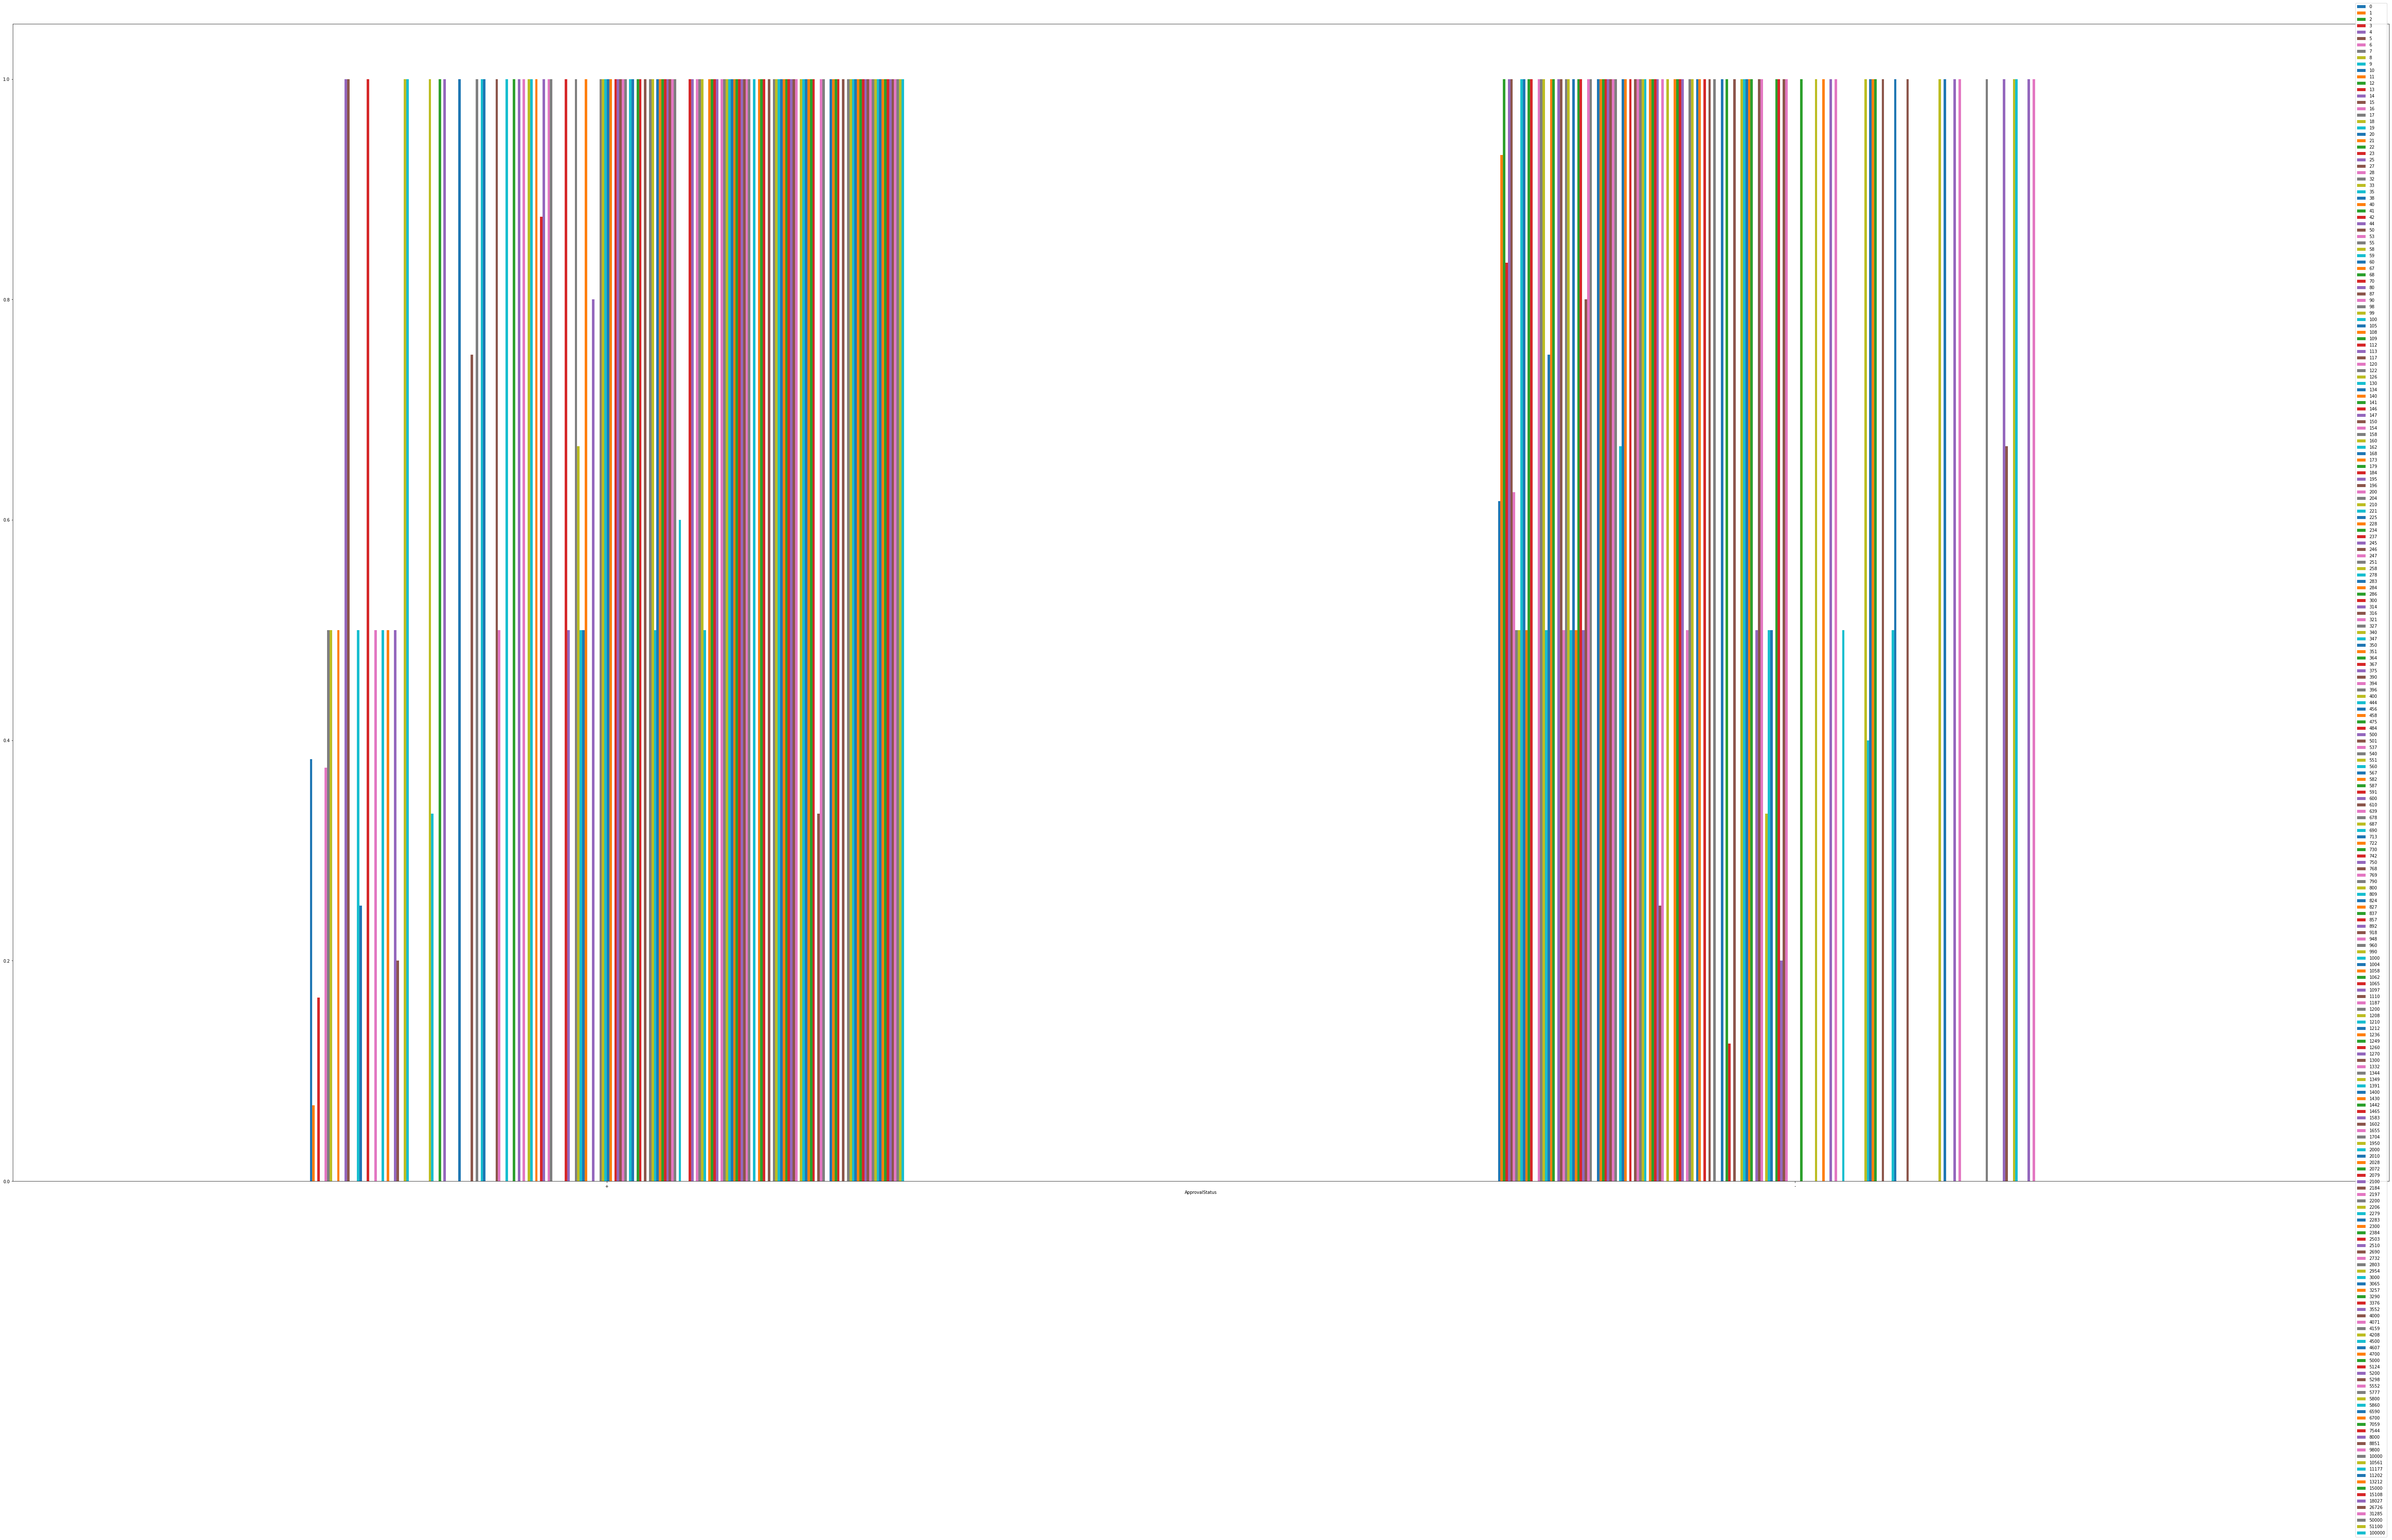

In [28]:
IncomeLevel = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['Income'])
IncomeLevel
IncomeLevel.div(IncomeLevel.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False, figsize=(100,50))


plt.xticks(rotation= 0)

plt.legend(bbox_to_anchor = (1, 1.02))

### ### The chart above shows no significant relationship

## Checking for outliers

Age                 AxesSubplot(0.125,0.125;0.110714x0.755)
Debt             AxesSubplot(0.257857,0.125;0.110714x0.755)
YearsEmployed    AxesSubplot(0.390714,0.125;0.110714x0.755)
CreditScore      AxesSubplot(0.523571,0.125;0.110714x0.755)
ZipCode          AxesSubplot(0.656429,0.125;0.110714x0.755)
Income           AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

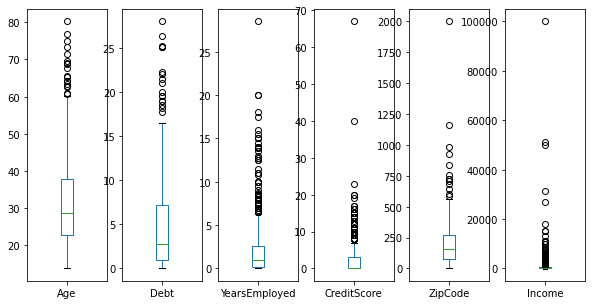

In [29]:
credit_card_app.plot(kind= 'box', subplots= True, figsize=(10,5))


### The chart shows that there are extrenous outliers in Income, Creditscore, ZipCode and Years Employed columns. That might be an indication to singularly remove the outlier data from dataframe

# CORRELATION PLOTS

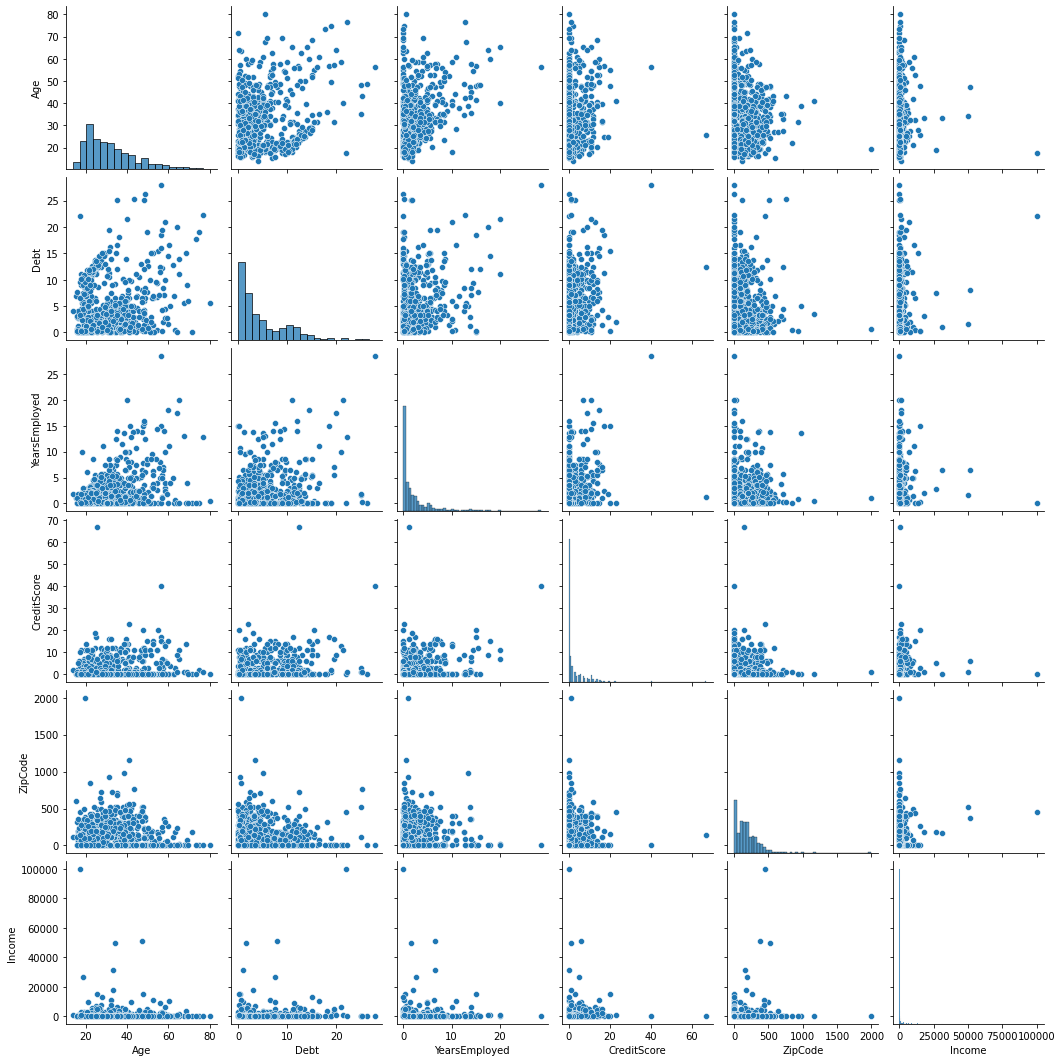

In [30]:
#shows how each of the attributes are related to each other
sns.pairplot(credit_card_app)

In [31]:
credit_card_app.corr()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
Age,1.000000,0.201316,0.392787,0.185575,-0.077161,0.018539
Debt,0.201316,1.000000,0.298902,0.271207,-0.222346,0.123121
YearsEmployed,0.392787,0.298902,1.000000,0.322330,-0.076389,0.051345
CreditScore,0.185575,0.271207,0.322330,1.000000,-0.119809,0.063692
ZipCode,-0.077161,-0.222346,-0.076389,-0.119809,1.000000,0.065609
Income,0.018539,0.123121,0.051345,0.063692,0.065609,1.000000


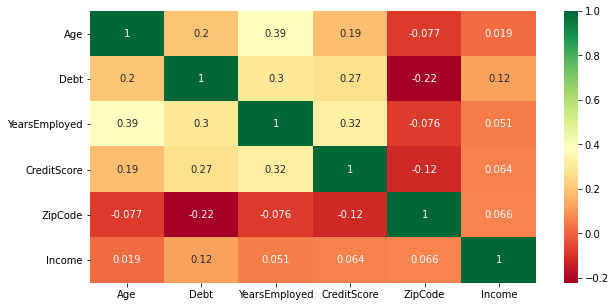

In [32]:
#get correlations of each features in dataset
corrmat = credit_card_app.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(credit_card_app[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### The above correlation plot shows the relationship of features with one another.

# Conclusion
### The following columns has a high correlation with the target variable

1. PriorDefault
2. CreditScore
3. Citizen
### The following has not shown high correlation but contains significant values
1. Age
2. Income
3. Education

### The following were not found to have any significant correlation with target variable
1. Gender
2. YearsEmployed
3. IncomeLevel
4. Debt
5. DriversLicense



# Preprocessing the Data 

In [33]:
#Function to convert the categorical variables to numerical data for further analysis
def Encoder(credit_card_app):
    to_encode = list(credit_card_app.select_dtypes(include = ['category', 'object']))
    
    #created a LabelEncoder object
    enc = LabelEncoder()
    
    for col in to_encode:
        try:
            credit_card_app[col] = enc.fit_transform(credit_card_app[col])
        except:
            print("Error while encoding " + col)
            
    return credit_card_app

In [34]:
#Convert the data into numerical data
credit_card_app = Encoder(credit_card_app)

In [35]:
#Check to see if the conversion is successful
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   EducationLevel  690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  ZipCode         690 non-null    float64
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


In [36]:
credit_card_app.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120.0,0,0


### All the categorical features have been convert to numerical data.

### The following changes were done :
     Gender - i) a is converted to 0
              ii) b is converted to 1 
           
     Married - i) b is converted to 0
               ii) l is converted to 1
               iii) u is converted to 2
               iv) y is converted to 3
     
     BankCustomer - i) b is converted to 0
                    ii) g is converted to 1
                    iii) gg is converted to 2
                    iv) p is converted to 3
     
     EducationLevel - i) aa is converted to 0
                      ii) b is converted to 1
                      iii) c is converted to 2
                      iv) cc is converted to 3
                      v) d is converted to 4
                      vi) e is converted to 5
                      vii) ff is converted to 6
                      viii) i is converted to 7
                      ix) j is converted to 8
                      x) k is converted to 9
                      xi) m is converted to 10
                      xii) q is converted to 11
                      xiii) r is converted to 12
                      xiv) w is converted to 13
                      xv) x is converted to 14
                      
     Ethnicity - i) b is converted to 0
                 ii) bb is converted to 1
                 iii) dd is converted to 2
                 iv) ff is converted to 3
                 v) h is converted to 4
                 vi) j is converted to 5
                 vii) n is converted to 6
                 viii) o is converted to 7
                 ix) v is converted to 8
                 x) z is converted to 9
     
     PriorDefault - i) f is converted to 0
                    ii) t is converted to 1
                    
     Employed - i) f is converted to 0
                ii) t is converted to 1
                
     DriversLicense - i) f is converted to 0
                      ii) t is converted to 1
                      
     Citizen - i) g is converted to 0
               ii) p is converted to 1
               iii) s is converted to 2
               
     ApprovalStatus - i) + is converted to 0
                      ii) - is converted to 1

# Splitting data into training and testing

In [37]:
#Assigning the features to X and target column  to Y. 
X = credit_card_app.iloc[:,0:15]
Y = credit_card_app.iloc[:,15]

In [38]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202.0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43.0,560
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280.0,824
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100.0,3
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120.0,0


In [39]:
# To understand the feature importance of the attributes
# check for feature Importance

from sklearn.ensemble import ExtraTreesRegressor
Extreg_model = ExtraTreesRegressor()
Extreg_model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [40]:
print(Extreg_model.feature_importances_)

[0.01648345 0.04911416 0.05226003 0.02478467 0.00915139 0.04980653
 0.03107549 0.04361847 0.51898598 0.05475797 0.01230541 0.01844472
 0.01430292 0.06662074 0.03828809]


### These are the importance of different features for predicting the values of Y

In [41]:
# Splitting the dataset into training and testing with a test size of 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

### So the total dataset here is split into training dataset and testing dataset with the size 0.3 for testing dataset. Random state was used for reproduceability.


# Scaling data to fit ML model

In [42]:
# Importing MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

# Fitting a Logistic Regression model to the train dataset

In [43]:
#import the logistic regression model to train the dataset
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier
logreg = LogisticRegression(random_state=0)
logreg.fit(rescaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction and Performance Evaluation


In [44]:
# Using the predict function to predict the rescaled_X_test

y_test_pred = logreg.predict(rescaled_X_test)

In [45]:
# Importing Confusion matrix and accuracy score to evaluate the performance of the model

from sklearn.metrics import confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, y_test_pred)

In [46]:
print(matrix)

[[87 12]
 [13 95]]


In [47]:
accuracy_score(y_test, y_test_pred)*100

87.92270531400966

From the above evaluation, we see that we have got 87 correct predictions for 0(+) and 13 incorrect predictions, and for 1(-) we have 95 correct and 12 incorrect predictions. This also gives us an accuracy of 87.92% which is good.

#Model Performance Tuning

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
random_state=[0]
dual=[False,True]
class_weight=[None,dict,'balanced']
multi_class = ['auto', 'ovr', 'multinomial']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,dual = dual,class_weight = class_weight,multi_class = multi_class, C=c_values,random_state = random_state)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(rescaled_X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.869664 using {'C': 100, 'class_weight': None, 'dual': False, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.868112 (0.048681) with: {'C': 100, 'class_weight': None, 'dual': False, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.868112 (0.048681) with: {'C': 100, 'class_weight': None, 'dual': False, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
0.868112 (0.048681) with: {'C': 100, 'class_weight': None, 'dual': False, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}
0.866550 (0.046566) with: {'C': 100, 'class_weight': None, 'dual': False, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}
0.865540 (0.047385) with: {'C': 100, 'class_weight': None, 'dual': False, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}
0.868112 (0.048681) with: {'C': 100, 'class_weight': None, 'dual': False, 'mu

Testing the best model from Grid Search CV 

In [49]:
model2 = LogisticRegression(C = 100, class_weight = None, dual = False,
                            multi_class = 'multinomial', penalty = 'l2', random_state = 0, solver = 'newton-cg')

In [50]:
model2.fit(rescaled_X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model2_pred = model2.predict(rescaled_X_test)

In [52]:
m2_matrix = confusion_matrix(y_test, model2_pred)
m2_matrix

array([[85, 14],
       [12, 96]])

In [53]:
m2_accuracy = accuracy_score(y_test, model2_pred)*100
m2_accuracy

87.43961352657004

Used Grid Search CV in tuning hyperperameters but it seems that the initial model(logreg) is still the best.

Maybe we should try decision tree classifier in order to improve the accuracy

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DTCmodel = DecisionTreeClassifier()

In [56]:
DTCmodel.fit(rescaled_X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
DTCpred = DTCmodel.predict(rescaled_X_test)

In [61]:
DTCmatrixs = confusion_matrix(y_test, DTCpred)
DTCmatrixs

array([[69, 30],
       [10, 98]])

In [62]:
DTCaccuracy = accuracy_score(y_test, DTCpred)*100
DTCaccuracy

80.67632850241546

In [63]:
from sklearn import tree

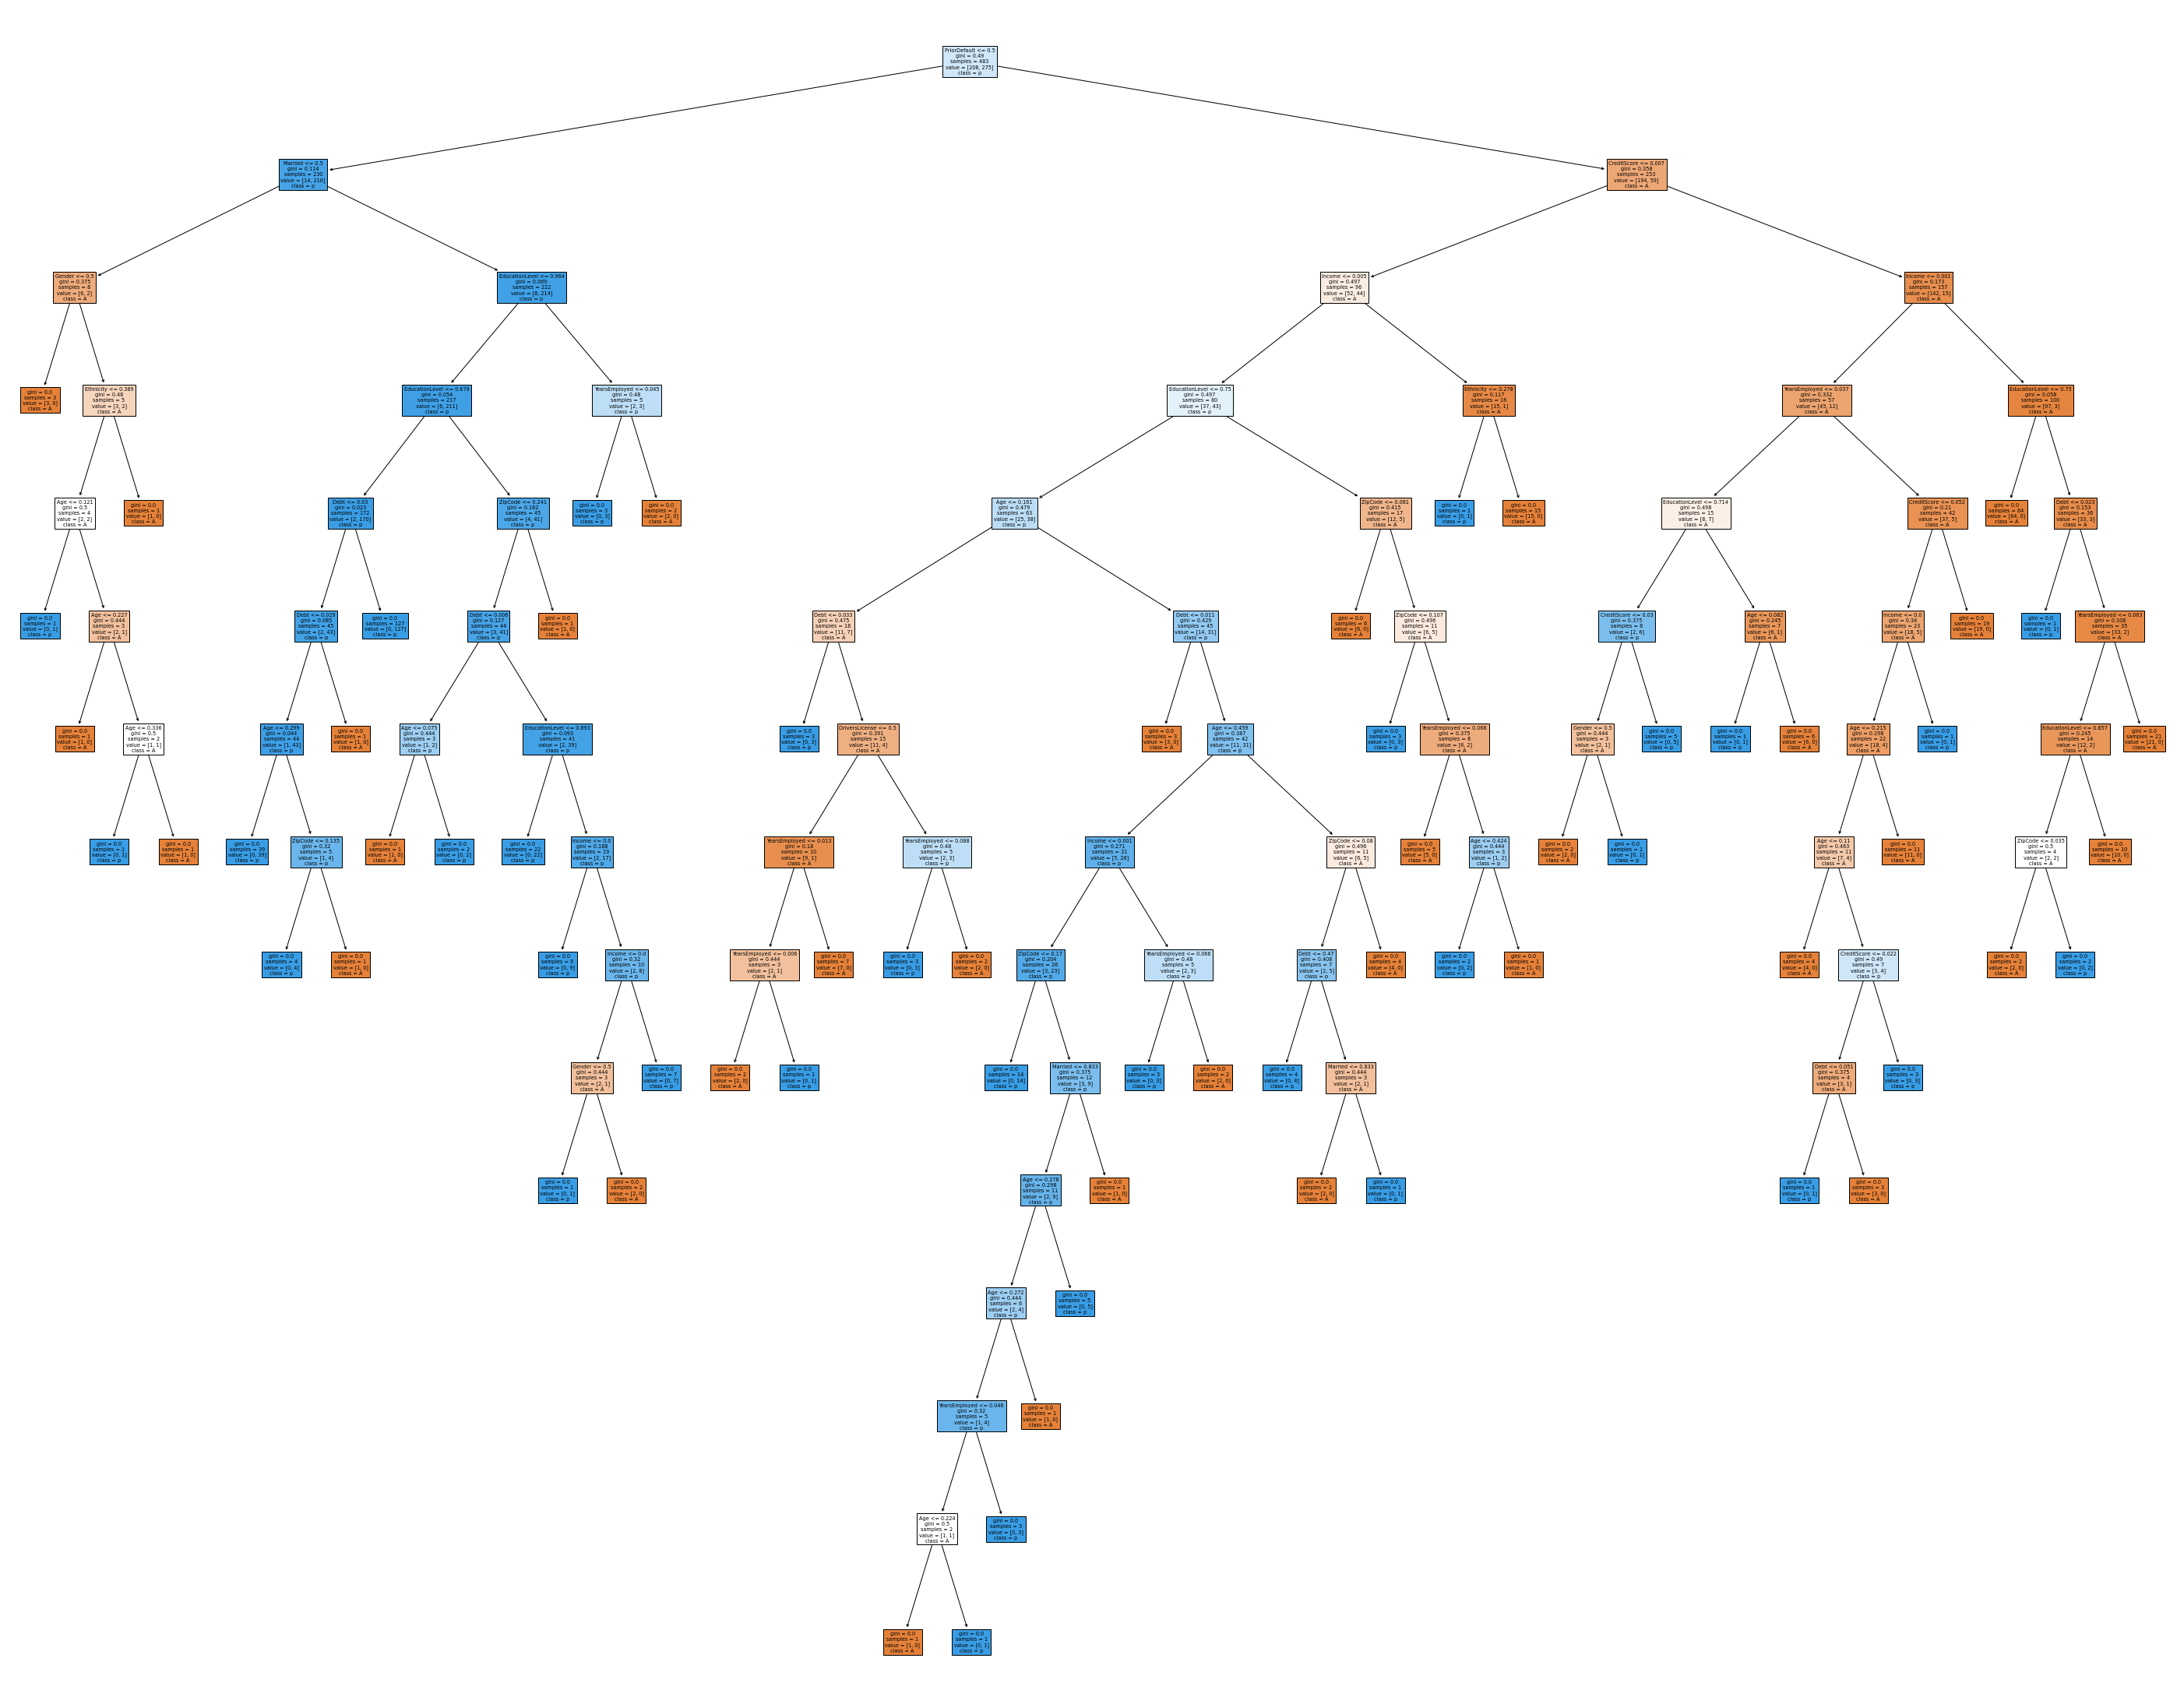

In [67]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(DTCmodel, 
                   feature_names=credit_card_app.columns,  
                   class_names= 'ApprovalStatus',
                   filled=True)